<a href="https://colab.research.google.com/github/joan-chep/Automatic-Number-Plate-Recognition-/blob/main/Copy_of_Plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A PROJECT ON A LICENSE RECOGNITION PLATE SYSTEM USING COMPUTER VISION.

# 1. Defining the question

To create a model that will be used to recognise and classify number plates.

# 2. Defining Metric of Success.

We will achieve our objectives when;

(a) The model achieves atleast 80% accuracy




# 3. Understanding the Context.

Automatic number plate recognition is a technology used on images to read vehicle registration plates to create vehicle location data.It can be used to store images captured by cameras as well as the text from the licensed plates. Therefore we are creating this automatic system that will help tracking the vehicles by tracing their number plates in the most efficient way.

# 4. Recording the Experimental Design.

The project will be undertaken through the following procedure;

Image Annotation

Loading Data

Modelling

Image Augmentation

Modelling

Conclusion

Recommendations.

## 1. Data Preprocessing

In [ ]:
#Mounting our drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the required libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Choosing the image size and batch size
image_size = 256
batch_size = 32

batch sizeis the number of pictures utilzed in one iteration.

In [ ]:
#Creating a dataset from our images
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Annotations",
    shuffle = True,
    image_size = (image_size, image_size),
    batch_size = batch_size
)

Found 218 files belonging to 8 classes.


In [ ]:
#Confirming the class names
class_names = dataset.class_names
class_names

['bodaboda',
 'civilian',
 'customized',
 'gk',
 'kg',
 'ngo',
 'parastatal',
 'tuktuk']

In [ ]:
#checking number of classes
classes = len(class_names)
print(classes)


8


In [ ]:
#Looking at the shape and batches of the images
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[7 6 2 6 1 1 3 1 4 6 1 0 2 2 6 2 6 6 1 1 1 2 0 0 6 1 6 7 2 6 2 4]


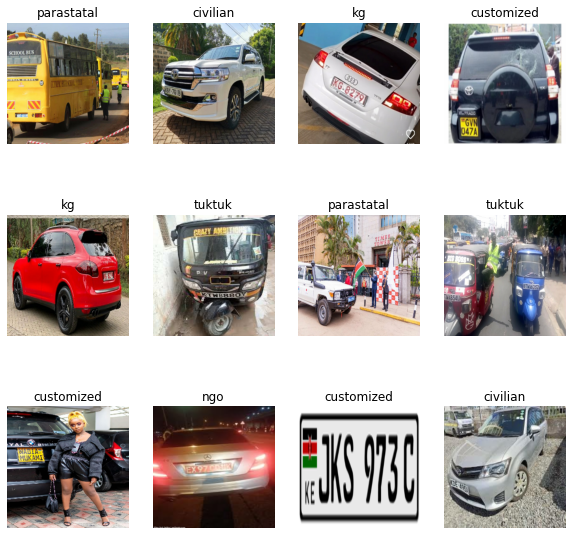

In [ ]:
#Checking if the classes and images are well put
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

the images were correctly classified in their respective classes

In [ ]:
#80% of the result will be used for validation
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Annotations',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 218 files belonging to 8 classes.
Using 175 files for training.


In [ ]:
## 20% of the result will be used for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Annotations',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 218 files belonging to 8 classes.
Using 43 files for validation.


## 2. Standardizing the Data

In [ ]:
# The RGB channel values are in the [0,255] range which are large and should standardize the values
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Normalization ensures every image pixel has a similar data distribution to make convergence faster when training the network.

In [ ]:
data_aug = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

## 3. Configuring Dataset Perfomance

In [ ]:
#Configurations of the perfomance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Training the Model

### CNN

We will use CNN to extract higher representations for the image content using the keras **Sequential algorithm** which allows us to create models layer by layer.

In [ ]:
#Setting layers for the model
num_classes = 8

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='softmax'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
#Setting the parameters of the model
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

we used parameters **adam** to handle sparse gradients on noisy problem 

and **SparseCategoricalCrossentropy** since our classes are mutually exclusive

In [ ]:
#Fitting the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,  
  verbose=True

)

Epoch 1/10
6/6 [==============================] - 46s 7s/step - loss: 2.0265 - accuracy: 0.2743 - val_loss: 1.9863 - val_accuracy: 0.2558
Epoch 2/10
6/6 [==============================] - 37s 6s/step - loss: 1.9936 - accuracy: 0.3029 - val_loss: 1.9826 - val_accuracy: 0.2558
Epoch 3/10
6/6 [==============================] - 38s 6s/step - loss: 1.9884 - accuracy: 0.3029 - val_loss: 1.9775 - val_accuracy: 0.2558
Epoch 4/10
6/6 [==============================] - 38s 6s/step - loss: 1.9832 - accuracy: 0.3029 - val_loss: 1.9725 - val_accuracy: 0.2558
Epoch 5/10
6/6 [==============================] - 37s 6s/step - loss: 1.9781 - accuracy: 0.3029 - val_loss: 1.9677 - val_accuracy: 0.2558
Epoch 6/10
6/6 [==============================] - 37s 6s/step - loss: 1.9731 - accuracy: 0.3029 - val_loss: 1.9631 - val_accuracy: 0.2558
Epoch 7/10
6/6 [==============================] - 47s 8s/step - loss: 1.9682 - accuracy: 0.3029 - val_loss: 1.9586 - val_accuracy: 0.2558
Epoch 8/10
6/6 [==================

In [ ]:
# Viewing all layers of the networki
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 127, 127, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 32)      36896     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 32)      

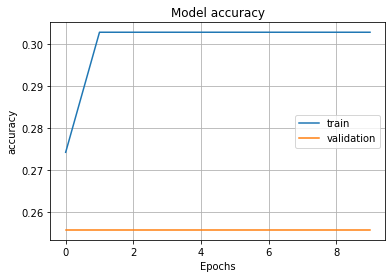

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Train accuracy rose to 30% and remained constant from the second
 epoch while the validation accuracy remained constant at 25% throughout

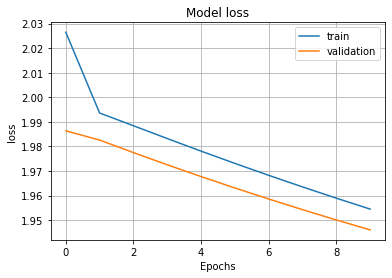

In [ ]:
#model loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Both train and validation losses were in a decline for every subsequent epoch






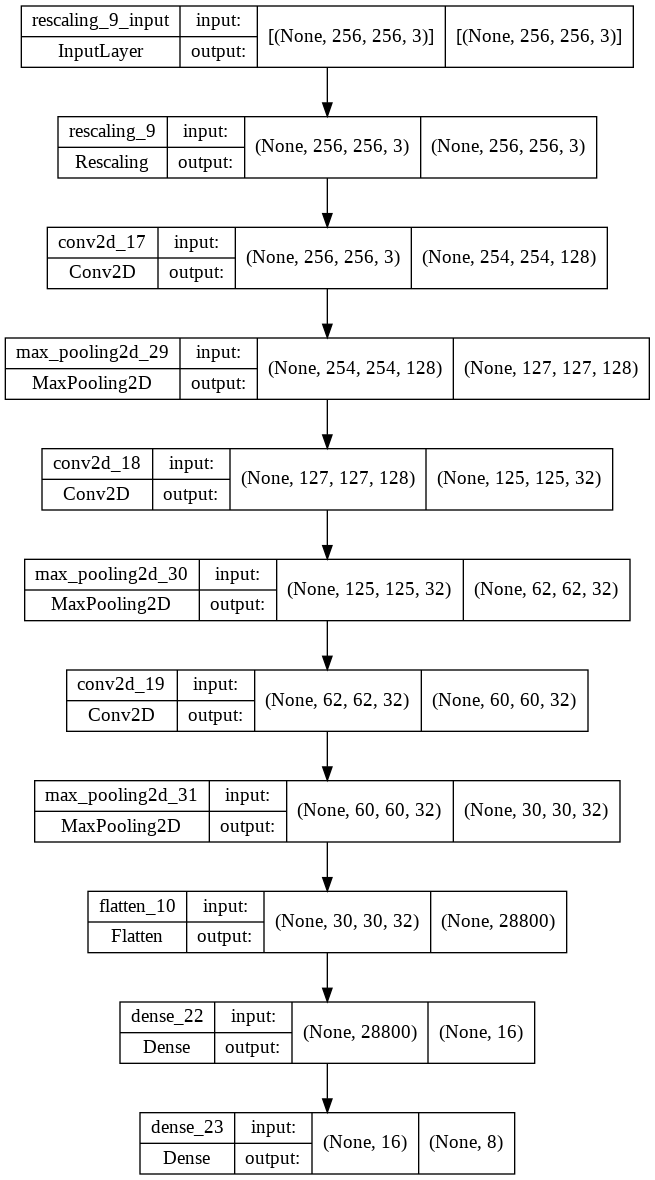

In [ ]:
#Plotting our model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Image Augmentation

Augmentation involves altering existing data to create some more data for the modelling process to reduce overfitting and improve generalization.

Found 218 images belonging to 8 classes.


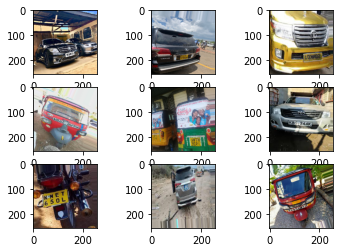

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.1, rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, horizontal_flip=True)

ite = datagen.flow_from_directory("/content/drive/MyDrive/Annotations", batch_size=1)

for i in range(9):

    # define subplot
    plt.subplot(330 + 1 + i)

    # generate batch of images
    batch = ite.next()

    # convert to unsigned integers for viewing
    image = batch[0]

    image = np.reshape(image,(256,256,3))
#y = np.reshape(y,(2*n,1))
    # plot raw pixel data
    plt.imshow(np.squeeze(image))

# show the figure
plt.show()

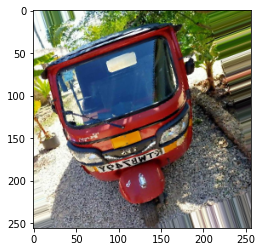

In [ ]:
#Let's retrieve an image from the dataset and use it to demonstrate data augmentation. 
for images, labels in train_ds.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    numpy_images = batch[0]

    numpy_images = np.reshape(numpy_images,(256,256,3))
#y = np.reshape(y,(2*n,1))
    # plot raw pixel data
    plt.imshow(np.squeeze(numpy_images))

In [ ]:
#With the shape information deduced, we can bring all images to a common shape:
img_height = 300
img_width = 500

def reshape_image_dataset(dataset: tf.data.Dataset):
    dataset = dataset.map(
        lambda image, label: (tf.image.resize_with_pad(image, target_height=img_height, target_width=img_width), label))
    return dataset
  
train_ds = reshape_image_dataset(train_ds)
val_ds = reshape_image_dataset(val_ds)

In [ ]:
img_width, img_height = 500,500

resize_rescale = tf.keras.Sequential([
          layers.experimental.preprocessing.Resizing(img_width, img_height),
          layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
print("Scaled min and max values respe:", results.numpy().min(), results.numpy().max())

Scaled min and max values respe: 4.7907874e-06 0.003921569


In [ ]:
#create the preprocessing layer and apply it repeatedly to an image to see the horizontal and vertical flips and rotation.
data_aug = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
# add image to batch
image = tf.expand_dims(image,0)

In [ ]:
image.shape

TensorShape([1, 256, 256, 3])

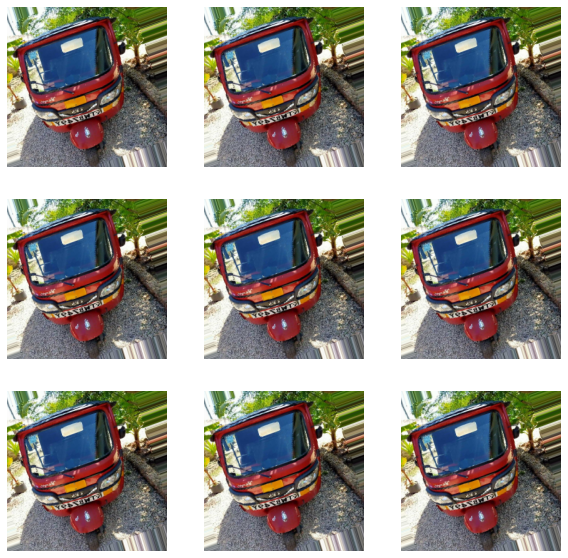

In [ ]:
#plotting the rotations
plt.figure(figsize=(10,10))
for i in range(9):
  aug_image = data_aug(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(aug_image[0])
  plt.axis('off')

### options for using preprocessing layers

In [ ]:
#Making it part of your model
model = tf.keras.Sequential([
      resize_rescale,
      data_aug,
      layers.Conv2D(20,3,padding='same',activation='relu'),
      layers.MaxPooling2D(),
                             
])

Data augmentation is inactive at test time so input images will only be augmented during calls to model.fit (not model.evaluate or model.predict).

## Training augmented dataset

In [ ]:
aug_ds = train_ds.map(lambda x,y: (resize_rescale(x, training=True), y))

In [ ]:
#prepocesing the augmented data
batch_size = 30
autotune = tf.data.AUTOTUNE

def prepare(ds,shuffle=False,augment=False):
  # resize and rescale all dataset
  ds = ds.map(lambda x,y: (resize_rescale(x, training=True), y), num_parallel_calls = autotune)
  if shuffle:
    ds = ds.shuffle(1000)
  
  # batch all dataset
  ds = ds.batch(batch_size)

  # use aug only on training set
  if augment:
    ds = ds.map(lambda x,y: (resize_rescale(x, training=True), y),num_parallel_calls = autotune)

  # use buffered prefecting on all ds
  return ds.prefetch(buffer_size=autotune)

In [ ]:
#train_ds = prepare(train_ds, shuffle=True, augment=True)
#val_ds = prepare(val_ds)


In [ ]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 300, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### preparing model

In [ ]:
model = tf.keras.Sequential([
         layers.Conv2D(20,3,padding='same',activation='relu'),
         layers.MaxPooling2D(),
         layers.Conv2D(40,3,padding='same',activation='relu'),
         layers.MaxPooling2D(),
         layers.Conv2D(60,3,padding='same',activation='relu'),
         layers.MaxPooling2D(),
         layers.Flatten(),
         layers.Dense(150, activation='relu'),
         layers.Dense(classes)                    
])

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [ ]:
history = model.fit(train_ds, validation_data=val_ds,epochs=10)

Epoch 1/10
6/6 [==============================] - 34s 5s/step - loss: 603.8701 - accuracy: 0.1771 - val_loss: 174.5977 - val_accuracy: 0.1628
Epoch 2/10
6/6 [==============================] - 34s 5s/step - loss: 37.5821 - accuracy: 0.2114 - val_loss: 6.9224 - val_accuracy: 0.2558
Epoch 3/10
6/6 [==============================] - 33s 5s/step - loss: 2.7395 - accuracy: 0.4629 - val_loss: 2.2452 - val_accuracy: 0.2558
Epoch 4/10
6/6 [==============================] - 33s 5s/step - loss: 1.3856 - accuracy: 0.6514 - val_loss: 2.5849 - val_accuracy: 0.3488
Epoch 5/10
6/6 [==============================] - 33s 5s/step - loss: 0.9771 - accuracy: 0.7086 - val_loss: 2.6635 - val_accuracy: 0.3256
Epoch 6/10
6/6 [==============================] - 32s 5s/step - loss: 0.4614 - accuracy: 0.9086 - val_loss: 3.5060 - val_accuracy: 0.3721
Epoch 7/10
6/6 [==============================] - 32s 5s/step - loss: 0.1506 - accuracy: 0.9657 - val_loss: 3.7870 - val_accuracy: 0.3953
Epoch 8/10
6/6 [=============

Accuracy increases to 100% after augmentation.

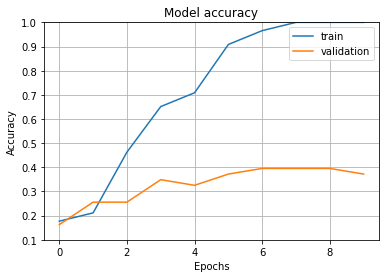

In [ ]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Train accuracy rises to 100 throughout the epochs

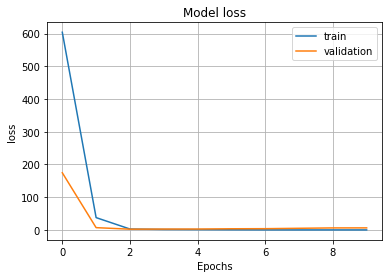

In [ ]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Both train and validation losses fall to zero

### custom data augmentation

In [ ]:
def random_invert_img(x, p=0.6):
  if tf.random.uniform([]) < p:
    x = (255 - x)
  else:
    x
  return x

In [ ]:
def random_inv(factor = 0.65):
  return layers.Lambda(lambda x:random_invert_img(x, factor))

random_invert = random_inv()

In [ ]:
class RandomInv(layers.Layer):
  def __init__(self,factor=0.5,**kwargs):
    super().__init__(**kwargs)
    self.factor = factor
  def call(self, x):
    return random_invert_img(x)

### tf. image

In [ ]:
def showcase(original,augmented):
  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.title('Original')
  plt.imshow(original)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.title('Augmented')
  plt.imshow(augmented)
  plt.axis('off')

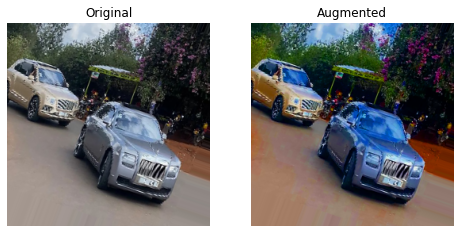

In [ ]:
#saturation
saturated = tf.image.adjust_saturation(numpy_images,3)
showcase(numpy_images, saturated)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


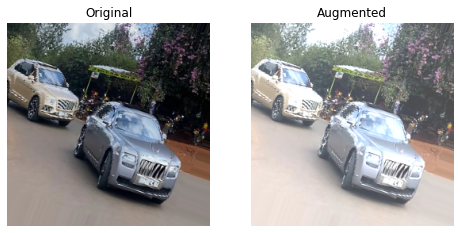

In [ ]:
#brightness
bright = tf.image.adjust_brightness(numpy_images,0.3)
showcase(numpy_images,bright)

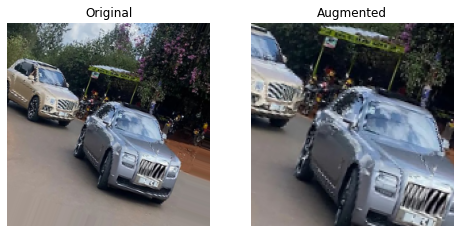

In [ ]:
crop = tf.image.central_crop(numpy_images,central_fraction=0.6)
showcase(numpy_images,crop)

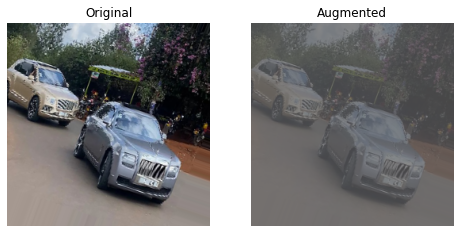

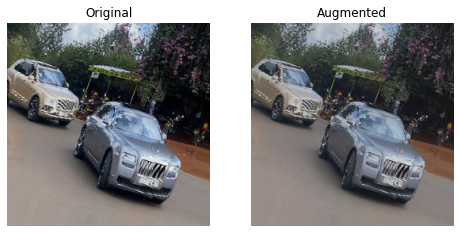

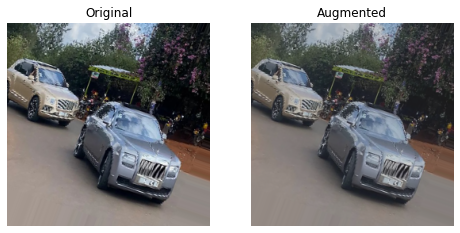

In [ ]:
for i in range(3):
  seed = (i,0)
  random_contrast = tf.image.stateless_random_contrast(numpy_images,seed = seed,lower=0.1,upper=0.9)
  showcase(numpy_images,random_contrast)

the a model has to be trained on augmented data, we will use a residual network ResNet50 model

## RESNET 50 MODEL

Residual networks (RESNET50) is a neural network used for many computer vision tasks.  You can load a pre-trained version of the network trained on more than a million images from the ImageNet database.

### Training the model

In [ ]:
import keras

keras.applications.resnet_v2.ResNet50V2()
def create_model(input_shape, num_classes):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    core = keras.applications.resnet_v2.ResNet50V2(
        input_tensor=input_layer, include_top=False, pooling="avg"
    )
    output = tf.keras.layers.Dense(units=num_classes)(core.output)

    return tf.keras.models.Model(input_layer, output)

model = create_model(input_shape=(img_height, img_width, 3), num_classes=len(labels))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
#TRAINING THE MODEL
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(300,500,3),
                    pooling ='avg', classes=8,
                    weights = 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add (Dense(218, activation='relu'))
resnet_model.add (Dense(8, activation='relu'))

94781440/94765736 [==============================] - 1s 0us/step


Together with the Adam optimizer (used with default settings) and sequential algorithm, we’ll instantiate our metrics and loss objects and then compile the model

In [ ]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 218)               446682    
                                                                 
 dense_6 (Dense)             (None, 8)                 1752      
                                                                 
Total params: 24,036,146
Trainable params: 448,434
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
#resnet_model.compile(optimizer=Adam(learning_rate= 0.001),loss='categorical_crossenthropy',metrics=['accuracy'])
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 103s 17s/step - loss: 2.1711 - accuracy: 0.2743 - val_loss: 1.9000 - val_accuracy: 0.2558
Epoch 2/10
6/6 [==============================] - 94s 16s/step - loss: 1.6364 - accuracy: 0.5143 - val_loss: 1.3780 - val_accuracy: 0.5349
Epoch 3/10
6/6 [==============================] - 103s 18s/step - loss: 1.2486 - accuracy: 0.6400 - val_loss: 1.3198 - val_accuracy: 0.5581
Epoch 4/10
6/6 [==============================] - 94s 16s/step - loss: 0.9307 - accuracy: 0.7371 - val_loss: 1.2241 - val_accuracy: 0.6047
Epoch 5/10
6/6 [==============================] - 93s 16s/step - loss: 0.7816 - accuracy: 0.7886 - val_loss: 1.0119 - val_accuracy: 0.6977
Epoch 6/10
6/6 [==============================] - 94s 16s/step - loss: 0.6301 - accuracy: 0.8400 - val_loss: 1.1575 - val_accuracy: 0.6512
Epoch 7/10
6/6 [==============================] - 93s 16s/step - loss: 0.5498 - accuracy: 0.8629 - val_loss: 1.0385 - val_accuracy: 0.6744
Epoch 8/10
6/6 [=========

RESNET50 achieved an accuracy of 88%

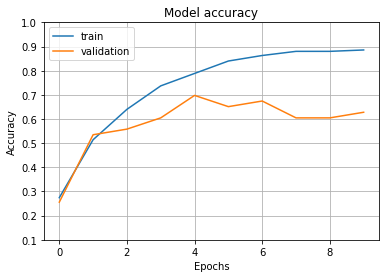

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Both train and validation accuracies kept on rising

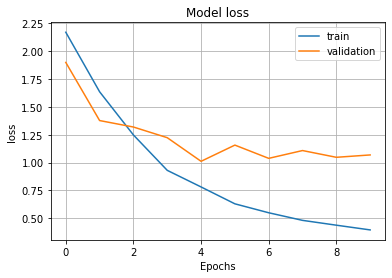

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Both train and validation losses kept on decreasing subsequently.

Conclusions

1. The CNN Model base model had an accuracy of 49% and after optimization the model achieved an accuracy of 100%.

2. Resnet 50 Model achieved an accuracy of 88%

Recommendations.

We would recommend the model to the government in order to detect and deter criminality. This can ben done by positioning cameras in fixed locations with high crime rates, the police are able to monitor the traffic and keep an eye out for suspect vehicles.